# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [49]:
# Checking the number of mice.
print(combined_study_data["Mouse ID"].nunique())

249


In [50]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_study_data[combined_study_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [51]:
# Optional: Get all the data for the duplicate mouse ID.


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = combined_study_data[combined_study_data['Mouse ID'] != "g989"]
clean


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [53]:
# Checking the number of mice in the clean DataFrame.
mice = clean['Mouse ID'].nunique()
mice

248

## Summary Statistics

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
regimen = clean.groupby('Drug Regimen')

mean = regimen['Tumor Volume (mm3)'].mean()
med = regimen['Tumor Volume (mm3)'].median()
var = regimen['Tumor Volume (mm3)'].var()
std = regimen['Tumor Volume (mm3)'].std()
sem = regimen['Tumor Volume (mm3)'].sem()

statistics = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': med,
    'Tumor Volume Variance': var,
    'Tumor Volume Std. Dev.': std,
    'Tumor Volume Std. Err.': sem
})

statistics.reset_index(inplace=True)
statistics

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [55]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_ver = clean.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

agg_ver


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

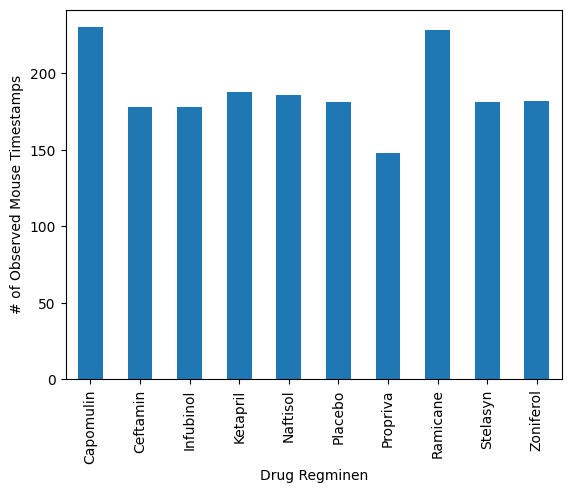

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot = regimen.size().plot(kind='bar', xlabel="Drug Regminen", ylabel= "# of Observed Mouse Timestamps")

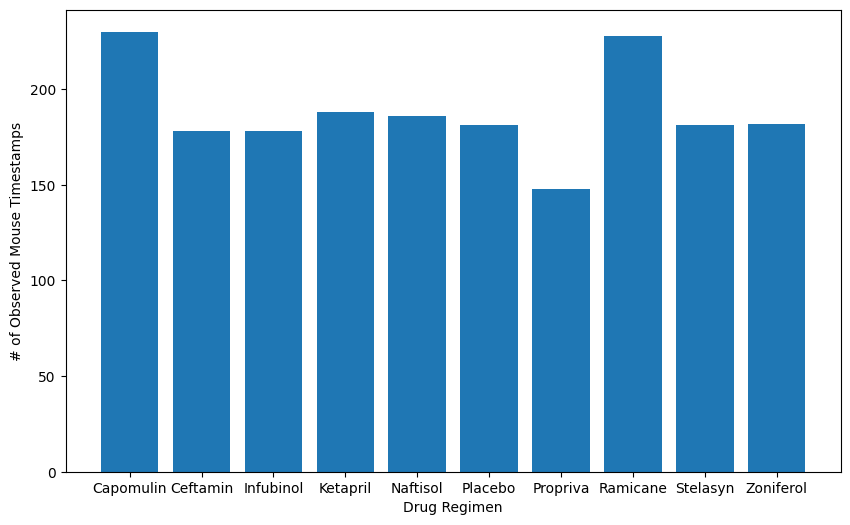

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(regimen.size().index, regimen.size().values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timestamps")
plt.show()

<Axes: title={'center': 'count'}>

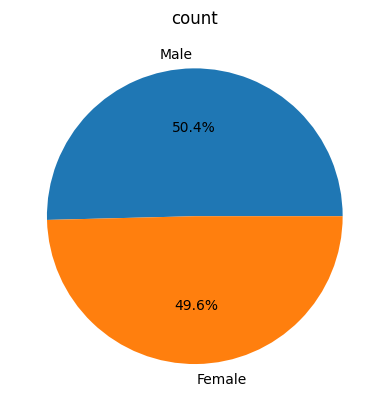

In [58]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

unique_mice = clean[["Mouse ID", "Sex"]].drop_duplicates()
gender_counts = unique_mice["Sex"].value_counts()

# Make the pie chart
gender_counts.plot.pie(autopct='%1.1f%%', ylabel='', title='count', labels=gender_counts.index)

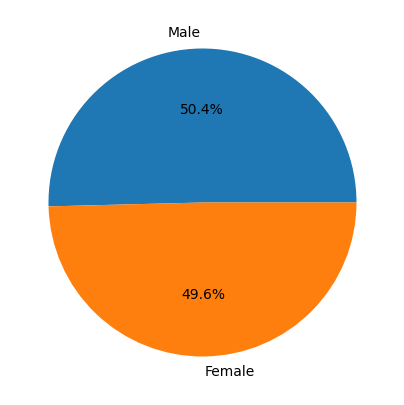

In [59]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean[["Mouse ID", "Sex"]].drop_duplicates()
gender_counts = unique_mice["Sex"].value_counts()

# Make the pie chart
plt.figure(figsize=(5, 5))  # Optional: to make the chart a bit larger
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.ylabel('')  # To match the Pandas plot with no ylabel
plt.show()

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest = clean.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge = pd.merge(clean, greatest, on=['Mouse ID', 'Timepoint'])

In [61]:
# Put treatments into a list for for loop (and later for plot labels)
list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_sizes = merge[merge['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # add subset
    vol_data.append(tumor_sizes)


    # Determine outliers using upper and lower bounds
    Q1 = tumor_sizes.quantile(0.25)
    Q3 = tumor_sizes.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = tumor_sizes[(tumor_sizes < lower_bound) | (tumor_sizes > upper_bound)]
    print("{}'s potential outliers: {}".format(drug, outliers))



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


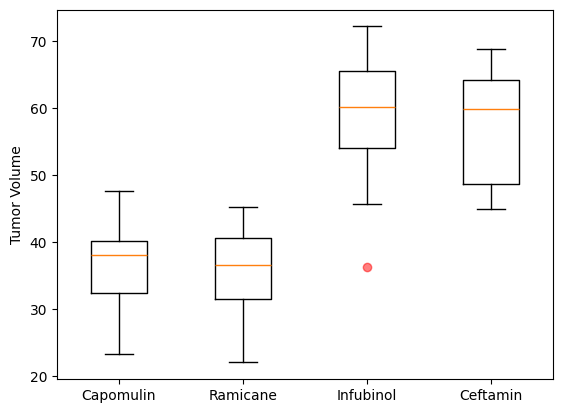

In [62]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(vol_data, flierprops=dict(marker='o', color='r', alpha=0.5, markerfacecolor='r', markeredgecolor='r'))
plt.xlabel('')
plt.ylabel('Tumor Volume')
plt.xticks(range(1, 5), list)
plt.show()

## Line and Scatter Plots

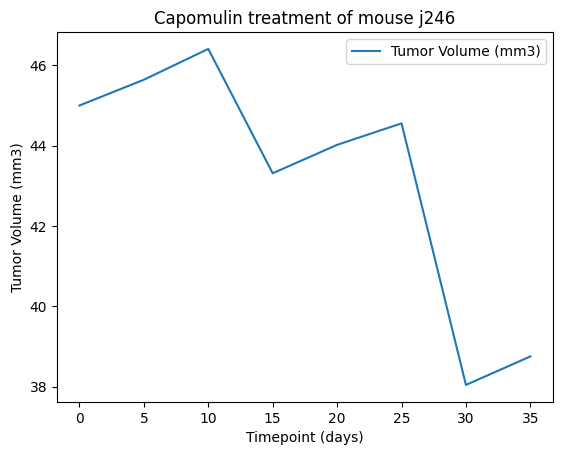

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
myMouse = clean[clean['Mouse ID'] == "j246"]
myMouse.plot(x="Timepoint", y= "Tumor Volume (mm3)", kind='line')
plt.title("Capomulin treatment of mouse j246")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

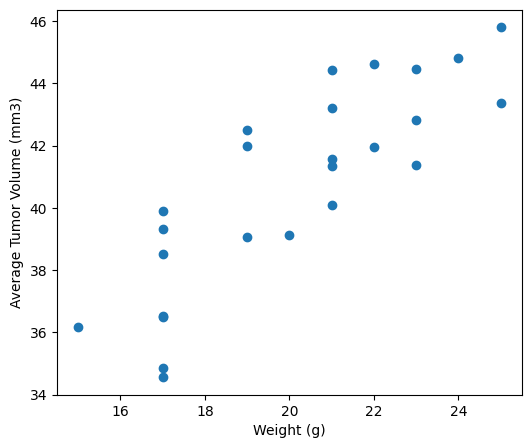

In [64]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group by mouse ID and calculate the average tumor volume for each mouse
capomulin = clean[clean['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
merged_data = pd.merge(avg_tumor_volume, capomulin[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

plt.figure(figsize=(6, 5))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


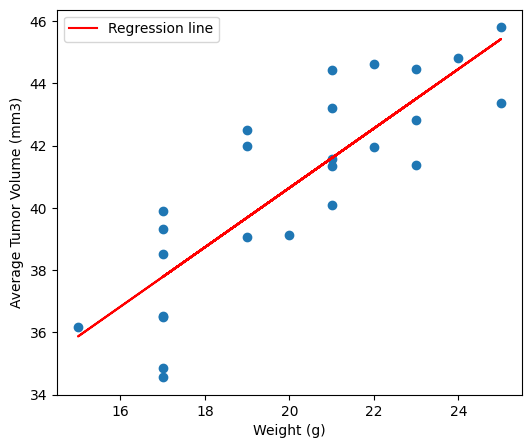

In [65]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation, 2)}")

slope, intercept, _, _, _ = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

plt.figure(figsize=(6, 5))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

regression_line = slope * merged_data['Weight (g)'] + intercept
plt.plot(merged_data['Weight (g)'], regression_line, color='red', label='Regression line')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.show()
